**Install dependencies**

In [1]:
# %%capture
# # Install the latest versions of the Pillow, fastai, numpy, pandas, and kaggle packages
# !pip install -U Pillow
# !pip install -U fastai
# !pip install -U numpy
# !pip install -U pandas
# !pip install -U kaggle

**Import dependencies**

In [2]:
# Import the random, pathlib, and PIL modules
import random
from pathlib import Path
from PIL import Image

# Import the get_image_files function from the fastai vision module
from fastai.vision.all import get_image_files

# Import the pandas package
import pandas as pd

# Set the max column width to None
pd.set_option('max_colwidth', None)

# Set the max number of rows and columns to None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Define path to image attribute data**

In [3]:
# Set the file path for the attributes dataframe
attributes_df_json_file = 'attributes_df.json'

# Print the file path
print(attributes_df_json_file)

attributes_df.json


**Import image attributes**

In [4]:
# Read the attributes dataframe from the JSON file
attributes_df = pd.read_json(attributes_df_json_file)

# Print the number of entries in the dataframe
print(f"Number of entries: {len(attributes_df)}")

# Display the first few rows of the dataframe
attributes_df.head()

Number of entries: 110715


,title,aspect_ratio,main_color,colors,tags,adult,aperture,camera,focal_length,google_place_id,iso,latitude,longitude,manufacturer,medical,orientation,racy,shutter_speed,software,spoof,violence,location
3186010,Pink and White Ice Cream Neon Signage,0.749809,"[128, 38, 77]","[#000000, #a52a2a, #bc8f8f, #c71585, #d02090, #d8bfd8]","[bright, chocolate, close-up, cold, cream, creamy, cup, dairy product, delicious, design, dessert, electricity, epicure, flavors, fluorescent, food, food photography, goody, hand, ice cream, icecream, illuminated, indulgence, light pink background, neon, neon lights, neon sign, pastry, pink background, pink wallpaper, scoop, sweet, sweets, tasty]",very_unlikely,1.8,iPhone X,4.00,ChIJkUjxJ7it1y0R4qOVTbWHlR4,40.0,-7.746914,113.226906,Apple,very_unlikely,0.0,unlikely,,13.1.3,very_unlikely,very_unlikely,"Kecamatan Mayangan, Jawa Timur, Indonesia"
3185509,Garnishing of Syrup on a Cheesecake,1.000000,"[185, 167, 164]","[#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]","[cheesecake, dessert, epicure, food photography, food plating, food porn, food preparation, food styling, garnishing, gastronomy, glaze, syrup]",very_unlikely,NaN,,NaN,None,NaN,NaN,NaN,,very_unlikely,NaN,unlikely,,,very_unlikely,very_unlikely,None
3182800,People in Front of the Computers,1.498501,"[176, 175, 169]","[#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]","[colleagues, computer, connection, cooperation, desk, dreadlocks, employees, facial expression, furniture, indoors, internet, looking, office, people, room, sit, sitting, table, teamwork, technology, women, work, working, workplace]",unlikely,NaN,None,NaN,None,NaN,NaN,NaN,None,very_unlikely,1.0,possible,None,Adobe Photoshop CC 2015 (Macintosh),very_unlikely,very_unlikely,None
3184308,Photo Of People Next To Each Other,1.500000,"[201, 179, 150]","[#708090, #a0522d, #cd853f, #eedd82, #ffdab9]","[adults, casual, communication, conversation, fashion, fashionable, fun, gather, gathered, gathering, happiness, happy, leisure, outfit, recreation, sit, sitting, smile, smiling, style, stylish, wear]",unlikely,NaN,None,NaN,None,NaN,NaN,NaN,None,very_unlikely,1.0,possible,None,Adobe Photoshop CC 2015 (Macintosh),very_unlikely,very_unlikely,None
3185747,Aerial View of Coconut Trees at Rural Area,1.499795,"[154, 139, 128]","[#696969, #808080]","[aerial shot, coconut trees, daylight, drone shot, exotic, high angle shot, outdoors, palm trees, sand, summer, trees, tropical]",None,2.6,FC1102,4.49,None,100.0,NaN,NaN,DJI,None,0.0,None,None,Adobe Photoshop Lightroom 5.7 (Windows),None,None,None


**Get only image titles**

In [5]:
# Create a dataframe of the 'title' column from the attributes dataframe
title_df = attributes_df['title'].to_frame()

# Display the first few rows of the dataframe
title_df.head()

,title
3186010,Pink and White Ice Cream Neon Signage
3185509,Garnishing of Syrup on a Cheesecake
3182800,People in Front of the Computers
3184308,Photo Of People Next To Each Other
3185747,Aerial View of Coconut Trees at Rural Area


**Get image ids**

In [6]:
# Create a list of the indexes of the attributes dataframe
img_ids = attributes_df.index.to_list()

# Print the first index from the list
print(img_ids[0])

3186010


**Define path to image dataset**

In [7]:
# Set the path for the data directory
data_dir = Path("/mnt/980_1TB_2/")

# Set the path for the images directory
img_dir = Path(data_dir/"Pexels_Full_768p_min_png/")

**Get image file paths**

In [8]:
# Get a list of the paths to the images in the images directory
img_paths = get_image_files(img_dir)

# Print the number of images in the images directory
print(len(img_paths))

110715


**Create image path dictionary**

In [9]:
# Create a dictionary mapping image IDs to image paths
img_path_dict = {path.stem.split('-')[-1] : path for path in img_paths}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict, orient='index').head()

,0
1252893,/mnt/980_1TB_2/Pexels_Full_768p_min_png/backlit-crystal-ball-dawn-1252893.png
1061142,/mnt/980_1TB_2/Pexels_Full_768p_min_png/1-art-background-1061142.png
2586334,/mnt/980_1TB_2/Pexels_Full_768p_min_png/1-person-beauty-face-blurred-background-2586334.png
1460032,/mnt/980_1TB_2/Pexels_Full_768p_min_png/1-wtc-artist-concert-1460032.png
1061133,/mnt/980_1TB_2/Pexels_Full_768p_min_png/10-art-artistic-1061133.png


**Select an image ID**

In [10]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)
# img_id = img_ids[0]

# Print the selected image ID
print(img_id)

1726997


**Inspect a sample image**

Title: Blue-haired Woman Surrounded by Green-leafed Plants


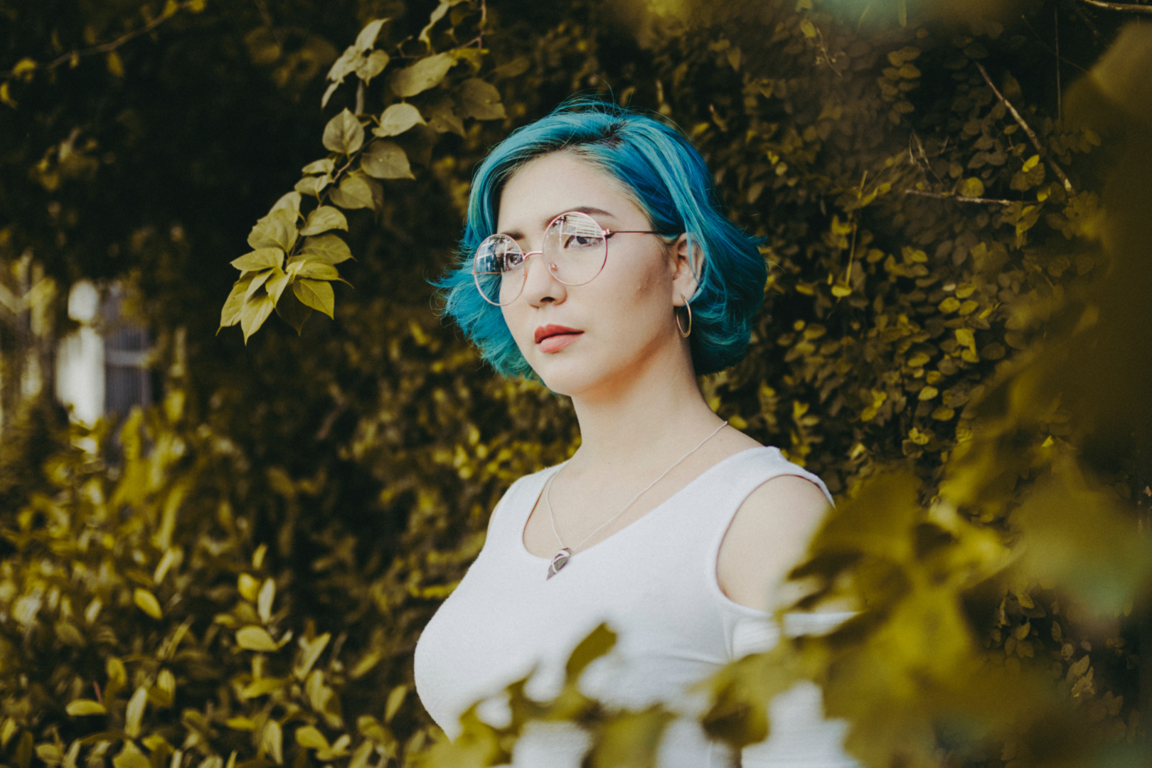

In [11]:
# Open the image located at the path in the img_path_dict with the key of the current img_id
sample_img = Image.open(img_path_dict[str(img_id)])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[img_id]['title']}")

# Display the image
sample_img

**Inspect tags for selected image**

In [12]:
# Retrieve the list of tags for the current image (identified by img_id)
# from the 'tags' column in the attributes_df dataframe
attributes_df.loc[img_id]['tags']

['beautiful',
 'beauty',
 'blue',
 'blue hair',
 'casual',
 'daylight',
 'eyeglasses',
 'eyewear',
 'face',
 'fashion',
 'female',
 'glass',
 'hair',
 'hairstyle',
 'leaves',
 'model',
 'outdoors',
 'person',
 'photoshoot',
 'plants',
 'portrait',
 'pose',
 'pretty',
 'style',
 'wear',
 'woman']

**Search dataset for a specific tag**

In [13]:
# Define the search term
tag_term = 'golden hour'

# Create a mask for the attributes_df dataframe to identify rows where the 'tags' column contains the search term
mask = attributes_df.tags.apply(lambda x: tag_term in x if x is not None else False)

# Create a new dataframe containing only the rows that match the mask
results_df = attributes_df[mask]

# Print the number of rows in the resulting dataframe
print(f"Found {len(results_df)} entries")

# Display the first few rows of the resulting dataframe
results_df.head()

Found 1316 entries


,title,aspect_ratio,main_color,colors,tags,adult,aperture,camera,focal_length,google_place_id,iso,latitude,longitude,manufacturer,medical,orientation,racy,shutter_speed,software,spoof,violence,location
3157917,Photo Of Sunset During Dawn,1.333234,"[152, 118, 96]","[#000000, #deb887, #e9967a]","[afterglow, calm, dawn, dusk, environment, golden hour, horizon, idyllic, nature, nature photography, ocean, peaceful, ripples, scenery, scenic, sea, seascape, sun, sunbeam, sunrise, sunset, tranquil]",very_unlikely,1.7,ONEPLUS A6013,4.25,ChIJCxgesixFDhMR0oAyeQNvqig,100.0,35.895207,14.5125,OnePlus,very_unlikely,1.0,very_unlikely,None,Snapseed 2.0,very_unlikely,very_unlikely,"Il-Belt Valletta, Malta"
3150702,Aerial Photography of City Buildings During Golden Hour,0.669421,"[137, 102, 94]","[#000000, #696969, #ff7f50, #ffa07a]","[city, dawn, dusk, fog, foggy, golden hour, hills, morning, scenery, scenic, silhouette, sky, sunrise, sunset, urban, view]",very_unlikely,5.6,NIKON D3000,70.00,None,100.0,NaN,NaN,NIKON CORPORATION,very_unlikely,1.0,very_unlikely,None,Adobe Photoshop CC 2019 (Macintosh),very_unlikely,very_unlikely,None
3157967,Calm Sea During Golden Hour,1.500000,"[119, 107, 97]","[#000000, #faebd7]","[clouds, dawn, dusk, golden hour, horizon, islands, ocean, outdoors, rock formation, sea, seashore, shore, sky, sunrise, sunset, travel, water]",very_unlikely,7.1,Canon EOS 6D,30.00,None,100.0,NaN,NaN,Canon,very_unlikely,0.0,very_unlikely,None,Adobe Photoshop Lightroom Classic 8.1 (Windows),very_unlikely,very_unlikely,None
3170887,Photo of Trees During Golden Hour,0.666667,"[142, 140, 132]","[#000000, #dcdcdc]","[dawn, dusk, environment, forest, golden hour, horizon, nature, outdoors, scenery, trees, woods]",None,1.8,Canon EOS Kiss X7,50.00,None,100.0,NaN,NaN,Canon,None,0.0,None,None,Adobe Photoshop Lightroom Classic 8.4 (Windows),None,None,None
3163677,Photo Of People In Front Of Mosque During Golden Hour,1.509804,"[189, 145, 91]","[#8b4513, #deb887, #faebd7]","[arches, architectural building, architectural design, architectural detail, architecture, belief, blue mosque, building, celebration, crowd, crowded, culture, dawn, daylight, delhi, domes, dusk, eid, exterior, faith, gathering, golden hour, grand mosque, historic, historical building, house of worship, islam, islamic architecture, jama, landmark, masjid, minarets, monument, mosque, muslim, muslims, outdoors, people, pillars, prayers, praying, ramadan, religion, religious, sacred, salah, sheikh zayed mosque, spirituality, square, sultan ahmed mosque, sun, sunbeam, sunlight, sunrays, sunrise, sunset, sunshine, temple, towers, tradition, traditional, travel, trust, turning point, worship]",very_unlikely,11.0,NIKON D7000,18.00,None,100.0,NaN,NaN,NIKON CORPORATION,very_unlikely,0.0,very_unlikely,,Adobe Photoshop Express 9.0 (Android),very_unlikely,very_unlikely,None


**Get image IDs from search results**

In [14]:
# Retrieve a list of the image IDs for the entries in the results_df dataframe
results_df_img_ids = results_df.index.to_list()

# Print the first image ID in the list
print(results_df_img_ids[0])

3157917


**Select an image ID**

In [15]:
# Choose a random image ID from the list of image IDs in the results_df dataframe
results_img_id = random.choice(results_df_img_ids)

# Print the chosen image ID
print(results_img_id)

3091261


**Inspect an image from the search results**

Title: Back View Photo of Man Playing Drums During Golden Hour


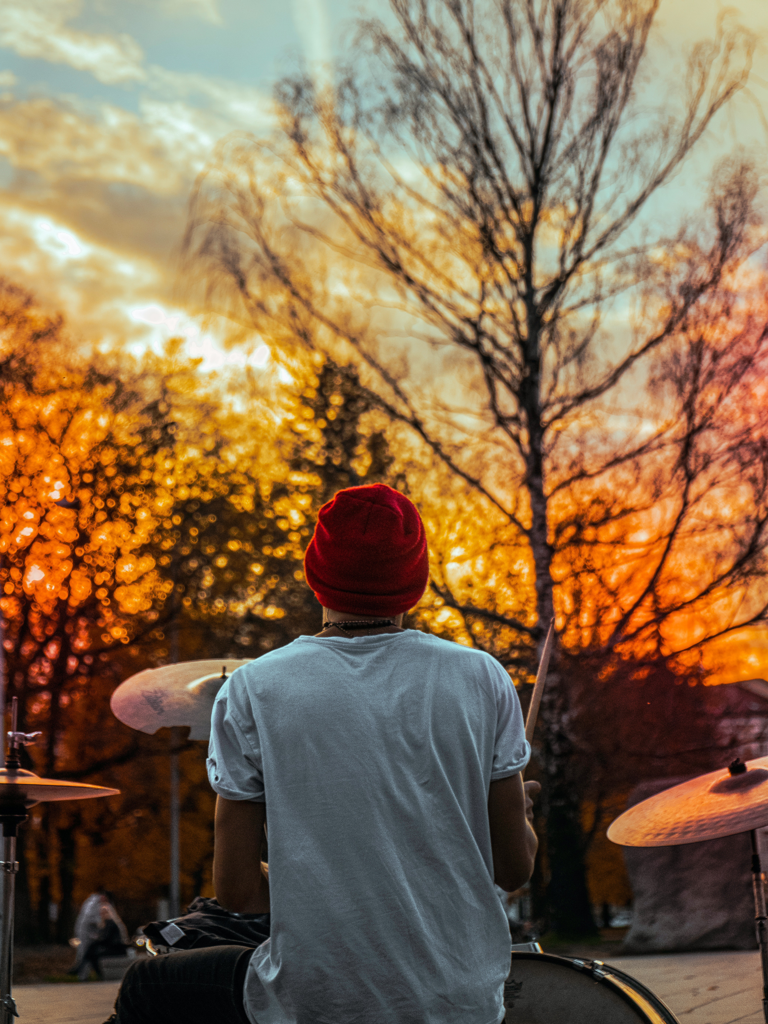

In [16]:
# Open the image located at the path in the img_path_dict with the key of the current results_img_id
sample_img = Image.open(img_path_dict[str(results_img_id)])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[results_img_id]['title']}")

# Display the image
sample_img